## Quantium Virtual Internship - Retail Strategy and Analytics 
### Data preparation and customer analytics 
- 1. EDA
- 2. Data cleaning
- 3. Data visualization and analysis
- 4. Present insights 
    


### 1.General statistics and EDA

In [1]:
# Import modules 
import pandas as pd
import numpy as np 
import os
from datetime import datetime
import xlrd
import matplotlib.pyplot as plt
import warnings
import seaborn as sb
import researchpy as rp
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [66]:
sb.set_style("darkgrid")
%matplotlib inline

In [3]:
# set data directory 
DATA_DIR = os.path.join('..','Quantium')
CUSTOMER_DATA = os.path.join(DATA_DIR,'QVI_purchase_behaviour.csv')
TRANSACTION_DATA = os.path.join(DATA_DIR,'QVI_transaction_data.xlsx')

In [4]:
#Load data 
customer = pd.read_csv(CUSTOMER_DATA)
transaction = pd.read_excel(TRANSACTION_DATA)

### Check customer dataset and data cleaning/transformation

In [5]:
customer.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [6]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
customer.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [8]:
# Convert LIFESTAGE and PREMIUM_CUSTOMER TO Categorical data to facilite further groupby operations
customer = customer.astype({'LIFESTAGE': 'category', 'PREMIUM_CUSTOMER': 'category'})

### Check transaction dataset and data cleaning/transformation

In [9]:
transaction.PROD_NAME.value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [10]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [11]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [12]:
# convert date from excel int format to datetime format
transaction['DATE'] = transaction['DATE'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))

In [13]:
transaction.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [14]:
# Convert columns to categorical type to save space and facilite further analysis 
transaction = transaction.astype({'STORE_NBR': 'category', 'PROD_NBR': 'category', 'PROD_NAME':'category'})

In [15]:
transaction.describe()

,LYLTY_CARD_NBR,TXN_ID,PROD_QTY,TOT_SALES
count,2.648360e+05,2.648360e+05,264836.000000,264836.000000
mean,1.355495e+05,1.351583e+05,1.907309,7.304200
std,8.057998e+04,7.813303e+04,0.643654,3.083226
min,1.000000e+03,1.000000e+00,1.000000,1.500000
25%,7.002100e+04,6.760150e+04,2.000000,5.400000
50%,1.303575e+05,1.351375e+05,2.000000,7.400000
75%,2.030942e+05,2.027012e+05,2.000000,9.200000
max,2.373711e+06,2.415841e+06,200.000000,650.000000


In [16]:
# Check the biggest purchase, outlier?
transaction.loc[transaction.PROD_QTY == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [17]:
# Remove the outliers, since this is not a regular transaction 
transaction.drop(69762,inplace = True)
transaction.drop(69763, inplace = True)

In [18]:
transaction_by_date = transaction.groupby('DATE').LYLTY_CARD_NBR.count().to_frame()
transaction_by_date

,LYLTY_CARD_NBR
DATE,
2018-07-01,724
2018-07-02,711
2018-07-03,722
2018-07-04,714
2018-07-05,712
...,...
2019-06-26,723
2019-06-27,709
2019-06-28,730


In [186]:
test = transaction.copy()
test.set_index('DATE',inplace=True)

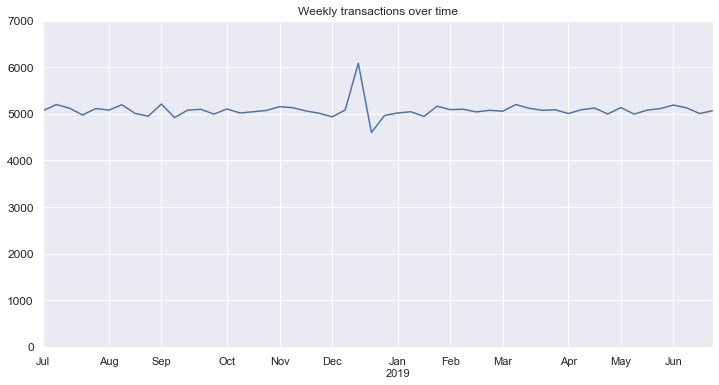

In [222]:
ax = transaction.query('DATE > "2018-07-01"').resample('W', label='left',on='DATE').count().\
STORE_NBR.plot(figsize=(12,6))
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set(title='Weekly transactions over time')
ax.set(ylim=(0,7000))
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=12);

In [19]:
# There’s only 364 rows, meaning only 364 dates which indicates a missing date. 
#Let’s create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to 
#create a chart of number of transactions over time to find the missing date. 

date_list = pd.Series(pd.date_range(start="2018-07-01",end="2019-06-30").to_pydatetime(),name = 'DATE').to_frame()
transaction_with_wholedate = date_list.merge(transaction_by_date,left_on='DATE', right_index=True, how='left')
transaction_with_wholedate.set_index('DATE',inplace = True)

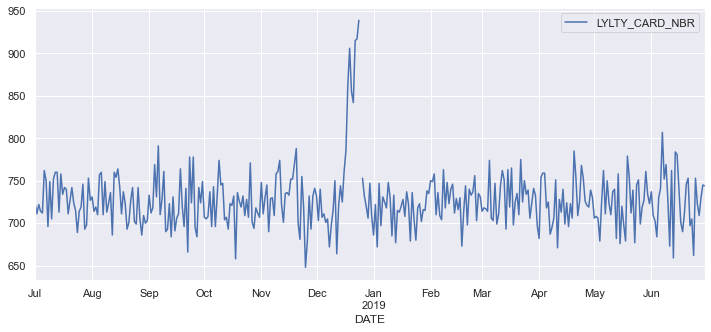

In [208]:
transaction_with_wholedate.plot(kind='line',figsize = (12,5))
plt.show()

In [21]:
# There is a break point around 2018 December, let's zoom in on this 
date_mask = (transaction_with_wholedate.index > '2018-11-30') & (transaction_with_wholedate.index < '2019-01-01')
month_12 = transaction_with_wholedate.loc[transaction_with_wholedate.index[date_mask]]

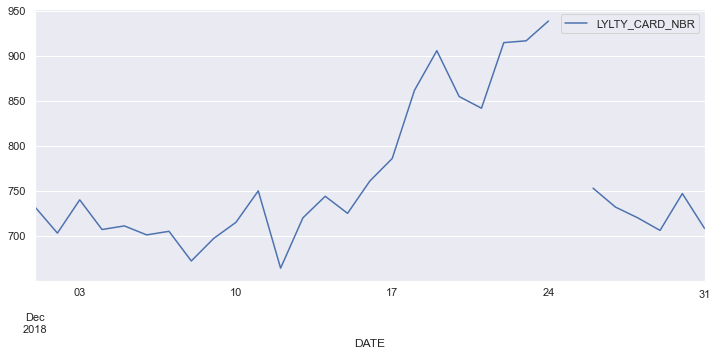

In [169]:
month_12.plot(kind='line',figsize = (12,5))
plt.show()

#### Observation:
We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on
Christmas day itself. This is due to shops being closed on Christmas day.


Now that we are satisfied that the data no longer has outliers, we can move on to creating other features
such as brand of chips or pack size from PROD_NAME. We will start with pack size.

In [23]:
# Create new column Pack_size by extract the  number from product name string
transaction['Pack_size'] = transaction.PROD_NAME.str.extract('(\d+)').astype('int')
transaction.Pack_size.value_counts().sort_index()

70      1507
90      3008
110    22387
125     1454
134    25102
135     3257
150    43131
160     2970
165    15297
170    19983
175    66390
180     1468
190     2995
200     4473
210     6272
220     1564
250     3169
270     6285
300    15166
330    12540
380     6416
Name: Pack_size, dtype: int64

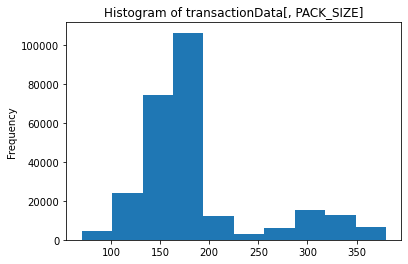

In [24]:
transaction.Pack_size.plot(kind='hist')
plt.title('Histogram of transactionData[, PACK_SIZE]')
plt.show()

#### Observation:
The largest size is 380g and the smallest size is 70g - seems sensible! 

Pack sizes created look reasonable and now to create brands, we can use the first word in PROD_NAME to
work out the brand name

In [25]:
# Create new column Brand by fetching the first word in product name
transaction['Brand'] = transaction.PROD_NAME.str.split().str.get(0)
transaction.Brand.unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [26]:
transaction.Brand = transaction.Brand.str.upper()

#### Observation:
Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red
Rock Deli chips. Let’s combine these together.

In [27]:
#Combine the same brand together 
transaction.loc[transaction.Brand == 'Red','Brand'] = 'RRD'
transaction.loc[transaction.Brand == 'SNBTS','Brand'] = 'SUNBITES'
transaction.loc[transaction.Brand == 'INFZNS','Brand'] = 'INFUZIONS'
transaction.loc[transaction.Brand == 'WW','Brand'] = 'WOOLWORTHS'
transaction.loc[transaction.Brand == 'SMITH','Brand'] = 'SMITHS'
transaction.loc[transaction.Brand == 'NCC','Brand'] = 'NATURAL'
transaction.loc[transaction.Brand == 'DORITO','Brand'] = 'DORITOS'
transaction.loc[transaction.Brand == 'GRAIN','Brand'] = 'GRNWVES'

In [28]:
transaction.Brand.value_counts().sort_index()

BURGER         1564
CCS            4551
CHEETOS        2927
CHEEZELS       4603
COBS           9693
DORITOS       28145
FRENCH         1418
GRNWVES        7740
INFUZIONS     14201
KETTLE        41288
NATURAL        7469
OLD            9324
PRINGLES      25102
RED            5885
RRD           11894
SMITHS        31823
SUNBITES       3008
THINS         14075
TOSTITOS       9471
TWISTIES       9454
TYRRELLS       6442
WOOLWORTHS    14757
Name: Brand, dtype: int64

### Merge customer and transaction dataset 

In [29]:
# Merge customer and transaction data  
merge_data = pd.merge(customer,transaction,on = 'LYLTY_CARD_NBR')

In [30]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   LIFESTAGE         264834 non-null  category      
 2   PREMIUM_CUSTOMER  264834 non-null  category      
 3   DATE              264834 non-null  datetime64[ns]
 4   STORE_NBR         264834 non-null  category      
 5   TXN_ID            264834 non-null  int64         
 6   PROD_NBR          264834 non-null  category      
 7   PROD_NAME         264834 non-null  category      
 8   PROD_QTY          264834 non-null  int64         
 9   TOT_SALES         264834 non-null  float64       
 10  Pack_size         264834 non-null  int64         
 11  Brand             264834 non-null  object        
dtypes: category(5), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 17.7+ MB


In [31]:
# Generate a sample for 30% 
# sample_customer = data.sample(frac =.25)

### Define metrics for analysis  
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What’s the average chip price by customer segment

##### We could also ask our data team for more information. Examples are:
- The customer’s total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips
- Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips


    - Total sales by dimension
    - Driver of sales 
    - Average unit purchased by customer by dimension

In [32]:
merge_data['Price'] = merge_data.TOT_SALES/merge_data.PROD_QTY

##### Let’s start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by these segments to describe which customer segment contribute most to chip sales.

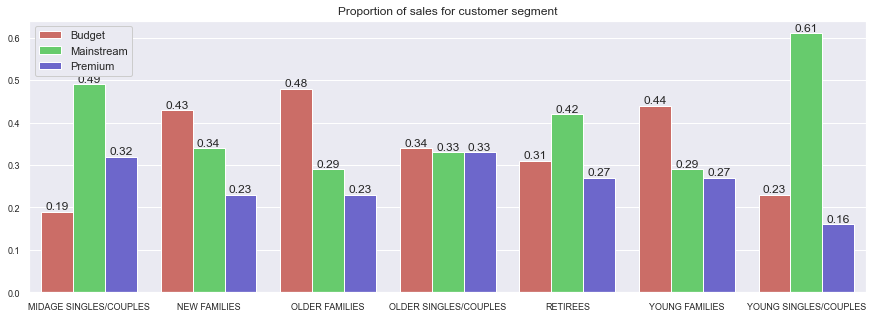

In [168]:
# Let's plot to see who contribute the most to sales 

sales_prop = round(merge_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.\
                   sum()/merge_data.groupby('LIFESTAGE').TOT_SALES.sum(),2)\
.to_frame()
sales_prop.reset_index(inplace=True)

plt.figure(figsize=(15,5))
ax = sb.barplot(data = sales_prop, x = 'LIFESTAGE', y = 'TOT_SALES', hue = 'PREMIUM_CUSTOMER', palette='hls')
ax.legend( ncol = 1, framealpha = 1)
plt.title('Proportion of sales for customer segment')
ax.set(xlabel=None)
ax.set(ylabel=None)
for container in ax.containers:
    ax.bar_label(container)
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9);

#### Observation:
Sales are coming mainly from `Budget - older families`, `Mainstream - young singles/couples`, and `Mainstream - retirees`, Let’s see if the higher sales are due to there being more customers who buy chips.

In [119]:
"""
sb.set_style("darkgrid")
test = customer_prop.copy()
df = test.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='LYLTY_CARD_NBR').reset_index()
ax = df.plot( x='LIFESTAGE', kind='bar', stacked=True, title='Stacked Bar Graph by dataframe', figsize=(12,7),\
            color=['red', 'skyblue', 'green'])
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.tick_params(axis='x', labelsize=9, rotation=0)
ax.tick_params(axis='y', labelsize=9);
"""

'\nsb.set_style("darkgrid")\ntest = customer_prop.copy()\ndf = test.pivot(index=\'LIFESTAGE\', columns=\'PREMIUM_CUSTOMER\', values=\'LYLTY_CARD_NBR\').reset_index()\nax = df.plot( x=\'LIFESTAGE\', kind=\'bar\', stacked=True, title=\'Stacked Bar Graph by dataframe\', figsize=(12,7),            color=[\'red\', \'skyblue\', \'green\'])\nax.set(xlabel=None)\nax.set(ylabel=None)\nax.tick_params(axis=\'x\', labelsize=9, rotation=0)\nax.tick_params(axis=\'y\', labelsize=9);\n'

In [142]:
#customer_prop['LYLTY_CARD_NBR'] = customer_prop.LYLTY_CARD_NBR.apply(lambda x:format(x,'.1%')).astype('float')

In [173]:
round(merge_data.groupby('LIFESTAGE').LYLTY_CARD_NBR.nunique()/1000,1)

LIFESTAGE
MIDAGE SINGLES/COUPLES     7.3
NEW FAMILIES               2.5
OLDER FAMILIES             9.8
OLDER SINGLES/COUPLES     14.6
RETIREES                  14.8
YOUNG FAMILIES             9.2
YOUNG SINGLES/COUPLES     14.4
Name: LYLTY_CARD_NBR, dtype: float64

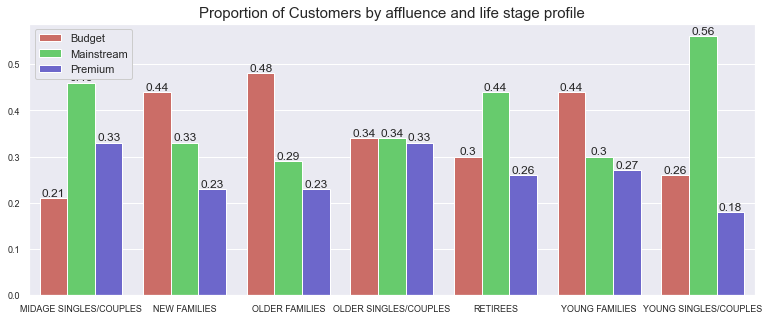

In [159]:
# Let's check total customer number by dimension 
customer_prop = round(merge_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique()\
                      /merge_data.groupby('LIFESTAGE').LYLTY_CARD_NBR.nunique(),2).to_frame()
customer_prop.reset_index(inplace=True)
#customer_prop['LYLTY_CARD_NBR'] = customer_prop.LYLTY_CARD_NBR.apply(lambda x:format(x,'.1%'))

plt.figure(figsize=(13,5))
ax = sb.barplot(data = customer_prop, x = 'LIFESTAGE', y = 'LYLTY_CARD_NBR', hue = 'PREMIUM_CUSTOMER',\
                palette = 'hls')
ax.legend( ncol = 1, framealpha = 1)
plt.title('Proportion of Customers by affluence and life stage profile',fontsize = 15)
ax.set(xlabel=None)
ax.set(ylabel=None)
for container in ax.containers:
    ax.bar_label(container)
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9);

In [76]:
merge_data.head(2)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_size,Brand,Price
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,3.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RED,2.7


In [ ]:
# plot bars in stack manner
x = 'LIFESTAGE'

plt.bar('LIFESTAGE', , color='r')
plt.bar('LIFESTAGE', y2, bottom=y1, color='b')
plt.bar('LIFESTAGE', y3, bottom=y1+y2, color='y')

#plt.xlabel("Teams")
#plt.ylabel("Score")
#plt.legend(["Round 1", "Round 2", "Round 3", "Round 4"])
plt.title("Scores by Teams in 4 Rounds")
plt.show()

#### Observation:
There are more `Mainstream - young singles/couples` and `Mainstream - retirees` who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the `Budget - Older families `segment.

Higher sales may also be driven by more units of chips being bought per customer. Let’s have a look at this
next.

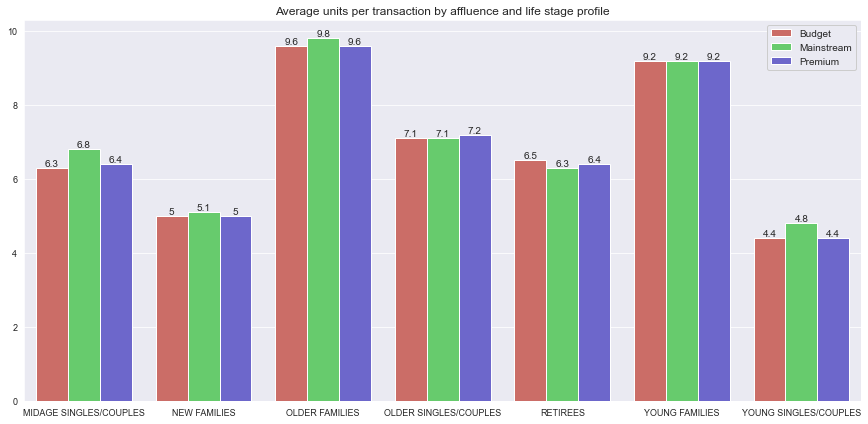

In [68]:
# Let's plot to check average quantity purchased by dimension 
unit_p_customer = round(merge_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum()\
                      /merge_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique(),1).to_frame()
unit_p_customer.reset_index(inplace=True)
unit_p_customer.rename(columns={0:'unit_p_customer'},inplace=True)

plt.figure(figsize=(15,7))
ax = sb.barplot(data = unit_p_customer, x = 'LIFESTAGE', y = 'unit_p_customer', hue = 'PREMIUM_CUSTOMER', palette = 'hls')
ax.legend( ncol = 1, framealpha = 1)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Average units per transaction by affluence and life stage profile')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9);

#### Observation:
Older families and young families in general buy more chips per customer.

Let’s also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

In [36]:
merge_data.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'DATE', 'STORE_NBR',
       'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'Pack_size',
       'Brand', 'Price'],
      dtype='object')

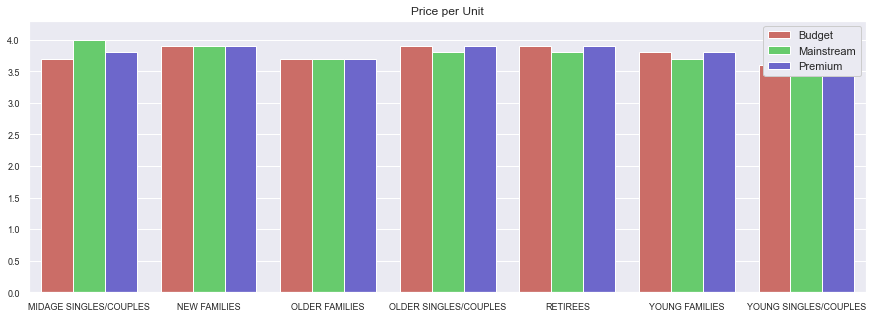

In [165]:
# Let's plot the average unit price per customer segment 
avg_price = round(merge_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).Price.mean(),1).to_frame()
avg_price.reset_index(inplace=True)

plt.figure(figsize=(15,5))
ax = sb.barplot(data = avg_price, x = 'LIFESTAGE', y = 'Price', hue = 'PREMIUM_CUSTOMER', palette='hls')
ax.legend( ncol = 1, framealpha = 1)
plt.title('Price per Unit')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9);

#### Observation:
`Mainstream midage` and `young singles and couples` are more willing to pay more per packet of chips compared to their budget and premium counterparts. 

This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

As the difference in average price per unit isn’t large, we can check if this difference is statistically different.

In [38]:
MS_Y_M = merge_data.loc[(merge_data.PREMIUM_CUSTOMER == 'Mainstream') &\
                        (( merge_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') | \
                         ( merge_data.LIFESTAGE == 'MIDAGE SINGLES/COUPLES')),'Price']
BM_Y_M = merge_data.loc[((merge_data.PREMIUM_CUSTOMER == 'Premium') | \
                         (merge_data.PREMIUM_CUSTOMER == 'Bduget')) & \
                        (( merge_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') | 
                         ( merge_data.LIFESTAGE == 'MIDAGE SINGLES/COUPLES')),'Price']

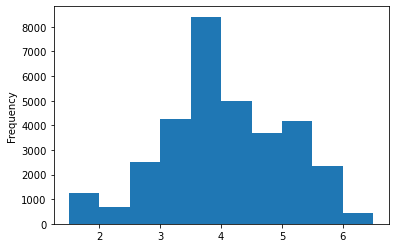

In [39]:
# Let's check distribution for those two dataset before doing the 2 sample t-test 
MS_Y_M.plot(kind='hist')
plt.show()

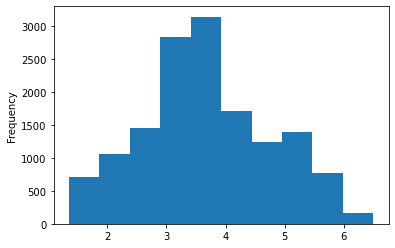

In [40]:
BM_Y_M.plot(kind='hist')
plt.show()

In [41]:
rp.ttest(group1= MS_Y_M, group1_name= "Mainstream",
         group2= BM_Y_M, group2_name= "Budget_Premium")

(         Variable        N      Mean        SD        SE  95% Conf.  Interval
 0      Mainstream  32728.0  4.045586  1.038600  0.005741   4.034333  4.056839
 1  Budget_Premium  14497.0  3.706384  1.134859  0.009425   3.687909  3.724859
 2        combined  47225.0  3.941459  1.080447  0.004972   3.931714  3.951204,
                             Independent t-test     results
 0  Difference (Mainstream - Budget_Premium) =       0.3392
 1                        Degrees of freedom =   47223.0000
 2                                         t =      31.8028
 3                     Two side test p value =       0.0000
 4                    Difference < 0 p value =       1.0000
 5                    Difference > 0 p value =       0.0000
 6                                 Cohen's d =       0.3173
 7                                 Hedge's g =       0.3173
 8                             Glass's delta =       0.3266
 9                               Pearson's r =       0.1448)

In [42]:
stats.ttest_ind(MS_Y_M,BM_Y_M)

Ttest_indResult(statistic=31.802755248380755, pvalue=1.2488894299193393e-219)

#### Observation:
The t-test results in a pvalue=1.2488894299193393e-219, the unit price for mainstream, young and mid-age singles and
couples are significantly higher than that of budget or premium, young and midage singles and couples

### Deep dive into specific customer segments for insights 

We might want to target customer segments that contribute the most to sales to retain them or further increase sales. Let’s look at `Mainstream - young singles/couples`. For instance, let’s find out if they tend to buy a particular brand of chips. 

In [43]:
target = merge_data.loc[(merge_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & \
                        (merge_data.PREMIUM_CUSTOMER == 'Mainstream')]
other = merge_data.loc[~((merge_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & \
                         ( merge_data.PREMIUM_CUSTOMER == 'Mainstream'))]

In [44]:
qty_target = target.PROD_QTY.sum()
qty_other = other.PROD_QTY.sum()
qty_target_by_brand = target.groupby('Brand').PROD_QTY.sum().rename('target')
qty_other_by_brand = other.groupby('Brand').PROD_QTY.sum().rename('other')
result_df = pd.concat([qty_other_by_brand, qty_target_by_brand], axis=1)

In [45]:
# Calculate Brand affinity compared to the rest of the population 
result_df['targetSegment'] = result_df.target/qty_target
result_df['otherSegment'] = result_df.other/qty_other
result_df['affinityToBrand'] = result_df.targetSegment/result_df.otherSegment

In [46]:
result_df.sort_values('affinityToBrand', ascending = False)

,other,target,targetSegment,otherSegment,affinityToBrand
Brand,,,,,
TYRRELLS,11155,1143,0.029587,0.023933,1.236235
TWISTIES,16445,1673,0.043306,0.035283,1.227401
KETTLE,71879,7172,0.185649,0.154216,1.203823
TOSTITOS,16489,1645,0.042581,0.035377,1.203638
OLD,16198,1607,0.041598,0.034753,1.196958
PRINGLES,43693,4326,0.111980,0.093743,1.194536
DORITOS,49069,4747,0.122877,0.105277,1.167176
COBS,16954,1617,0.041856,0.036375,1.150700
INFUZIONS,24776,2343,0.060649,0.053157,1.140947


#### Observation:
We can see that :
- Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population
- Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest of the population


##### Let’s also find out if our target segment tends to buy larger packs of chips.

In [47]:
# Find out preferrence by pack size  
qty_target_by_size = target.groupby('Pack_size').PROD_QTY.sum().rename('target')
qty_other_by_size = other.groupby('Pack_size').PROD_QTY.sum().rename('other')
result_df = pd.concat([qty_other_by_size, qty_target_by_size], axis=1)

result_df['targetSegment'] = result_df.target/qty_target
result_df['otherSegment'] = result_df.other/qty_other
result_df['affinityToBrand'] = result_df.targetSegment/result_df.otherSegment

In [48]:
result_df.sort_values('affinityToBrand',ascending=False)

,other,target,targetSegment,otherSegment,affinityToBrand
Pack_size,,,,,
270,10896,1153,0.029846,0.023377,1.276694
380,11108,1165,0.030156,0.023832,1.265361
330,21779,2220,0.057465,0.046727,1.229814
134,43693,4326,0.111980,0.093743,1.194536
110,38985,3850,0.099658,0.083642,1.191482
210,10907,1055,0.027309,0.023401,1.167002
135,5677,535,0.013849,0.012180,1.136997
250,5549,520,0.013460,0.011905,1.130611
170,35162,2926,0.075740,0.075440,1.003980


In [49]:
merge_data.loc[merge_data.Pack_size == 270,'Brand'].value_counts()

TWISTIES    6285
Name: Brand, dtype: int64

#### Observation:
It looks like Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared to the rest of the population but let’s dive into what brands sell this pack size.

Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of
purchasing Twisties.

### Conclusion 

- Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream retirees shoppers. 


- We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. 


- Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.


- We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour.


In [50]:
# Export the merge_data into csv for further analysis  
merge_data.to_csv('merge_data.csv', index=False)